# Assignment 5
## Due May 29th

Lan, Songnian and Zhang, Guangde

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

np.random.seed(42)

## Exercise 1

### a)

In [166]:
candy = pd.read_csv("candy-data.csv")
names = candy['competitorname']
Y = candy['chocolate']
idx = ['fruity', 'caramel', 'peanutyalmondy', 'nougat', 
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent']
X = candy[idx]


### b)

In [132]:
itrain = int(np.round(len(X)/3*2, decimals=0))
X_train = X.ix[0:itrain]
X_test = X.ix[itrain:len(X)]
Y_train = Y.ix[0:itrain]
Y_test = Y.ix[itrain:len(Y)]


### c)

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((Y_train, Y_test))

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, Y_train)

Y_predict = lr.predict(X_test)

ids = Y_test.loc[Y_test == Y_predict]

accuracy = len(ids)/len(Y_test)
print('accuracy: {:.2f}'.format(accuracy))


accuracy: 0.75


### d)

d. scores:
[0.53448276 0.53448276 0.53448276 0.86206897 0.75862069 0.72413793
 0.68965517]


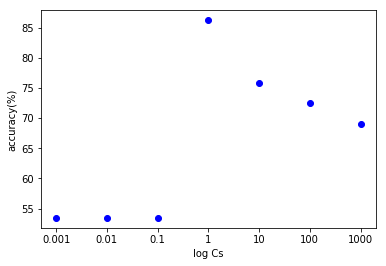

In [140]:
Cs =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]

from sklearn import svm
svc = svm.SVC()
parameters = {'C':Cs}
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
y_predict = clf.predict(X_test)
scores = clf.cv_results_['mean_test_score']
print('d. scores:\n{}'.format(scores))
plt.plot(np.log10(Cs), scores*100, 'bo');
plt.xticks([-3, -2, -1, 0, 1, 2, 3], Cs);
plt.xlabel('log Cs');
plt.ylabel('accuracy(%)');

# use score to check
accuracies = []
for c in Cs:
    lr = LogisticRegression(C=c)
    lr.fit(X_train_std, Y_train)
    Y_predict = lr.predict(X_test)
    # check accuracy
    ac = np.round(lr.score(X_test, Y_test), decimals=4)
    accuracies.append(ac)
# print('accuracies:\n{}'.format(accuracies))


From the graph, we can knows, that $C=1$ is the best.

## Exercise 2

In [30]:
X, Y = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_repeated=0, n_classes=2, 
                           n_clusters_per_class=2, random_state=300, 
                           class_sep=1)
X_train, Y_train = X[:300], Y[:300]
X_test, Y_test = X[300:], Y[300:]

### a)

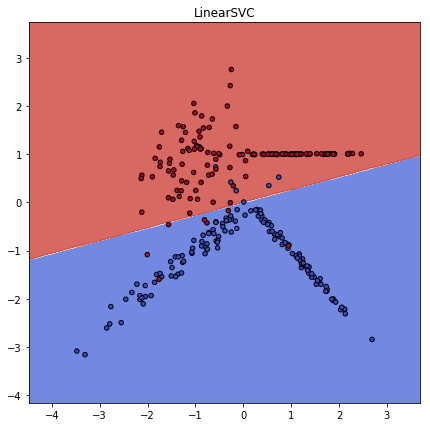

In [85]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

C = 1.0
ls = LinearSVC(C=C);
ls.fit(X_train, Y_train)
titles = 'LinearSVC'

X0, X1 = X_train[:,0], X_train[:,1];
xx, yy = make_meshgrid(X0, X1);

fig = plt.figure(figsize=(7,7))
# plot_counters(fig, models, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
Z = ls.predict(np.c_[xx.ravel(), yy.ravel()])
# print('Z.shape:{}, xx.shape:{}'.format(Z.shape, xx.shape))
Z = Z.reshape(xx.shape)
out = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# print('X0:{}, X1:{}, xx:{}, yy:{}'.format(X0.shape, X1.shape, xx.shape, yy.shape))
plt.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title(titles)
plt.show()

### b)

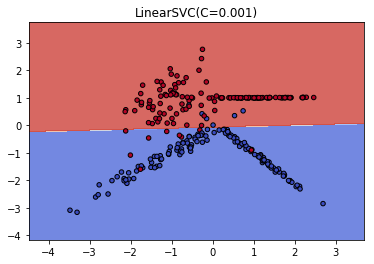

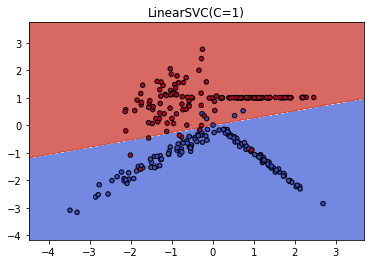

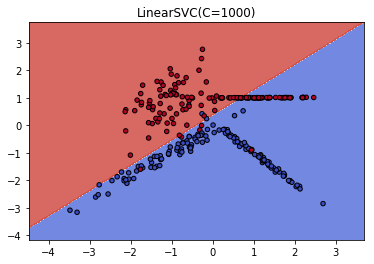

In [106]:
Cs = [0.001, 1, 1000]
for i, C in enumerate(Cs):
    ls = LinearSVC(C=C);
    ls.fit(X_train, Y_train)
    titles = 'LinearSVC(C={})'.format(C)

    X0, X1 = X_train[:,0], X_train[:,1];
    xx, yy = make_meshgrid(X0, X1);

    # plot_counters(fig, models, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    Z = ls.predict(np.c_[xx.ravel(), yy.ravel()])
    # print('Z.shape:{}, xx.shape:{}'.format(Z.shape, xx.shape))
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # print('X0:{}, X1:{}, xx:{}, yy:{}'.format(X0.shape, X1.shape, xx.shape, yy.shape))
    plt.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.title(titles)
    plt.show()


### c)

d. scores:
[0.5167 0.5167 0.95   0.9633 0.9667 0.97   0.96  ]


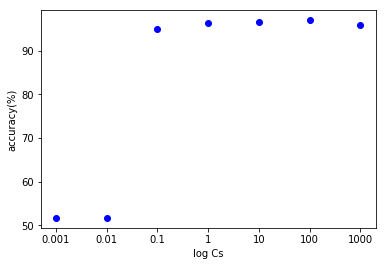

In [127]:
Cs =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
svc = svm.SVC()
parameters = {'C':Cs}
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
y_predict = clf.predict(X_test)
scores = clf.cv_results_['mean_test_score']
print('d. scores:\n{}'.format(np.round(scores, decimals=4)))
plt.plot(np.log10(Cs), scores*100, 'bo');
plt.xticks([-3, -2, -1, 0, 1, 2, 3], Cs);
plt.xlabel('log Cs');
plt.ylabel('accuracy(%)');


From the graph we can konws, that $C=100$ is the best.

### d)

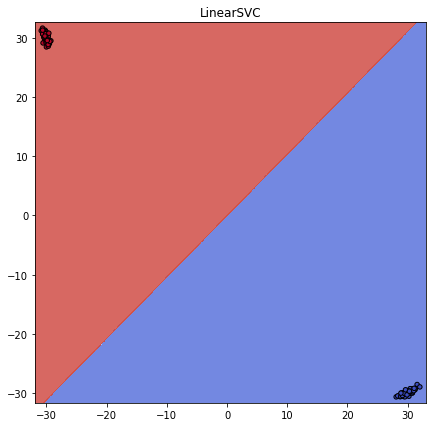

score: 99.33%


In [163]:
with open("dataset_1.pickle", "rb") as f:
    X_1, Y_1 = pickle.load(f)
X_1_train, Y_1_train = X_1[:100], Y_1[:100]
X_1_test, Y_1_test = X_1[100:], Y_1[100:]
# print(Y_1_train)


ls = LinearSVC();
ls.fit(X_1_train, Y_1_train)
titles = 'LinearSVC'

X0, X1 = X_1_train[:,0], X_1_train[:,1];
xx, yy = make_meshgrid(X0, X1);

fig = plt.figure(figsize=(7,7))
# plot_counters(fig, models, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
Z = ls.predict(np.c_[xx.ravel(), yy.ravel()])
# print('Z.shape:{}, xx.shape:{}'.format(Z.shape, xx.shape))
Z = Z.reshape(xx.shape)
out = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# print('X0:{}, X1:{}, xx:{}, yy:{}'.format(X0.shape, X1.shape, xx.shape, yy.shape))
plt.scatter(X0, X1, c=Y_1_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title(titles)
plt.show()
print('score: {}%'.format(np.round(ls.score(X_1_test, Y_1_test), decimals=4)*100))

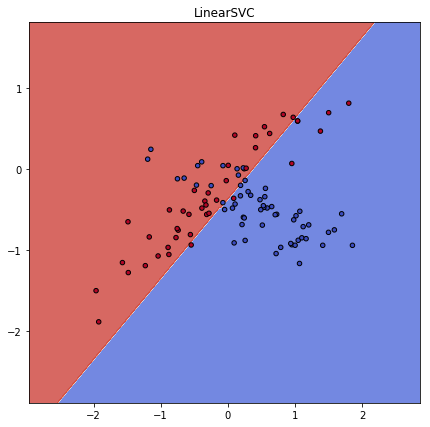

score: 79.0%


In [164]:
with open("dataset_2.pickle", "rb") as f:
    X_2, Y_2 = pickle.load(f)
X_2_train, Y_2_train = X_2[:100], Y_2[:100]
X_2_test, Y_2_test = X_2[100:], Y_2[100:]


ls = LinearSVC();
ls.fit(X_2_train, Y_2_train)
titles = 'LinearSVC'

X0, X1 = X_2_train[:,0], X_2_train[:,1];
xx, yy = make_meshgrid(X0, X1);

fig = plt.figure(figsize=(7,7))
# plot_counters(fig, models, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
Z = ls.predict(np.c_[xx.ravel(), yy.ravel()])
# print('Z.shape:{}, xx.shape:{}'.format(Z.shape, xx.shape))
Z = Z.reshape(xx.shape)
out = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# print('X0:{}, X1:{}, xx:{}, yy:{}'.format(X0.shape, X1.shape, xx.shape, yy.shape))
plt.scatter(X0, X1, c=Y_2_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title(titles)
plt.show()
print('score: {}%'.format(np.round(ls.score(X_2_test, Y_2_test), decimals=4)*100))


The first dataset is clearly and easy to classify, and the accuracy is 99.33%.

But the second dateset is difficult to classify, and the accuracy is only 79.0%.